# ICS 485 Course Project:
Ahmed Alzuhair ID: 202278540
Abdulaziz Alqahtani

## Data Analysis and Preprocessing

In [255]:
import pandas as pd


df = pd.read_csv("dataset-train-vf.csv")

df_test = pd.read_csv("dataset-test-vf.csv")

print("train dataset shape:", df.shape)

print("test dataset shape:", df_test.shape)

print("Training dataset")
display(df.head())

print("Testing Dataset")
df_test.head()


train dataset shape: (4480, 13)
test dataset shape: (792, 12)
Training dataset


,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,y
0,1,NaN,62330,NaN,0.748,4.845455,30405,18.066667,2.807634,663180,NaN,C1,square
1,2,NaN,4370,NaN,0.858,1.072727,2445,1.266667,0.712986,49420,NaN,C2,square
2,3,0.000729,1449,196.3,0.841,0.172727,795,0.420000,0.112528,16240,NaN,C2,square
3,4,0.043499,24702,349.7,0.594,5.254545,9570,7.160000,2.417831,239680,0.430355,C3,circle
4,5,0.000972,1104,162.5,0.792,0.109091,570,0.320000,0.066930,12040,NaN,C3,square


Testing Dataset


,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11
0,4481,NaN,8855,NaN,0.657,1.336364,3795,2.566667,0.680134,89320,NaN,C2
1,4482,0.014257,40480,117.65,0.552,2.900000,14580,11.733333,1.240056,382480,NaN,C1
2,4483,0.000567,966,340.60,1.000,0.200000,630,0.280000,0.154930,11760,0.021441,C3
3,4484,NaN,1035,NaN,0.911,0.218182,615,0.300000,0.153972,12040,NaN,C1
4,4485,0.000972,2208,297.70,0.865,0.400000,1245,0.640000,0.268028,25060,0.027402,C4



Training Missing values per column:
 ID        0
f1     1838
f2        0
f3     1384
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10    3912
f11       0
y         0
dtype: int64
\Testing Missing values per column:
 ID       0
f1     306
f2       0
f3     243
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
f10    668
f11      0
dtype: int64

Statistics:
                 ID           f1            f2           f3           f4  \
count  4480.000000  2642.000000  4.480000e+03  3096.000000  4480.000000   
mean   2240.500000     0.007127  2.559716e+04   234.375598     0.786005   
std    1293.408932     0.009138  9.400564e+04   106.207714     0.163220   
min       1.000000     0.000081  1.610000e+02    35.750000     0.062000   
25%    1120.750000     0.001397  2.783000e+03   170.300000     0.681000   
50%    2240.500000     0.003321  7.590000e+03   218.075000     0.802500   
75%    3360.250000     0.008586  2.270100e+04   271.050000     0.920000 

<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:6: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipykernel_952127/1180353275.py:6: SyntaxWarning: invalid escape sequence '\T'
  print("\Testing Missing values per column:\n", df_test.isna().sum())


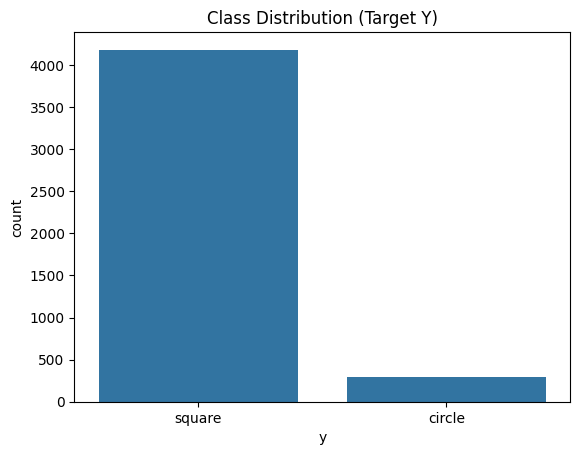

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt

print("\nTraining Missing values per column:\n", df.isna().sum())

print("\Testing Missing values per column:\n", df_test.isna().sum())

print("\nStatistics:\n", df.describe())


# Class distribution
sns.countplot(x=df.iloc[:, -1])
plt.title("Class Distribution (Target Y)")
plt.show()

### *2.1 Data Cleaning*

In [257]:
# Drop ID (since it is not useful)
# + drop f10 (missing 3912/4480 which is a lot that we cannot recover)
df = df.drop(columns=["ID", "f10"])

## remove from test data columns
df_test = df_test.drop(columns=["ID", "f10"])

print(df.head())

         f1     f2     f3     f4        f5     f6         f7        f8  \
0       NaN  62330    NaN  0.748  4.845455  30405  18.066667  2.807634   
1       NaN   4370    NaN  0.858  1.072727   2445   1.266667  0.712986   
2  0.000729   1449  196.3  0.841  0.172727    795   0.420000  0.112528   
3  0.043499  24702  349.7  0.594  5.254545   9570   7.160000  2.417831   
4  0.000972   1104  162.5  0.792  0.109091    570   0.320000  0.066930   

       f9 f11       y  
0  663180  C1  square  
1   49420  C2  square  
2   16240  C2  square  
3  239680  C3  circle  
4   12040  C3  square  


### *_* Data Spliting

In [258]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

print(X_train.shape, X_val.shape)

numeric_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print("Numeric:", numeric_cols)
print("Categorical:", categorical_cols)




(3808, 10) (672, 10)
Numeric: ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']
Categorical: ['f11']


### 2.2 Filling NaN Values

Impute the cols that have missing values, since the missing values are in coloumns f1 and f3 are all numeric then take the median

In [259]:
from sklearn.experimental import enable_iterative_imputer  # required import
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Initialize IterativeImputer
iter_imputer = IterativeImputer(
	estimator=RandomForestRegressor(
		n_estimators=50,
		random_state=42,
		n_jobs=-1
	),
	max_iter=10,
	random_state=42
)

# Impute missing values in numeric columns of X_train
X_train[numeric_cols] = iter_imputer.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = iter_imputer.transform(X_val[numeric_cols])

# Impute missing values in numeric columns of df_test using the same imputer
df_test[numeric_cols] = iter_imputer.transform(df_test[numeric_cols])

X_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f11
120,0.005427,18492.0,244.400,0.751,2.745455,9060.0,5.360000,1.597197,197120.0,C4
826,0.008424,19136.0,373.750,0.870,4.345455,10860.0,5.546667,2.928592,217840.0,C3
3034,0.010693,27324.0,109.200,0.693,1.809091,12345.0,7.920000,0.971176,281540.0,C2
2117,0.002349,4002.0,273.000,0.937,0.663636,2445.0,1.160000,0.481697,47180.0,C4
3715,0.002997,6808.0,243.750,0.753,1.009091,3345.0,1.973333,0.588613,72660.0,C4
...,...,...,...,...,...,...,...,...,...,...
1925,0.000786,1449.0,247.650,0.857,0.218182,810.0,0.420000,0.144845,16380.0,C4
2908,0.000972,2208.0,277.550,0.906,0.372727,1305.0,0.640000,0.261592,25620.0,C1
2141,0.008100,25300.0,289.263,0.882,4.727273,14550.0,7.333333,3.229859,289800.0,C4
3870,0.003402,8694.0,249.600,0.817,1.318182,4635.0,2.520000,0.834261,96180.0,C4


In [260]:

import seaborn as sns
import matplotlib.pyplot as plt

print("\nTraining Missing values per column:\n", X_train.isna().sum())

print("\Testing Missing values per column:\n", df_test.isna().sum())


Training Missing values per column:
 f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f11    0
dtype: int64
\Testing Missing values per column:
 f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f11    0
dtype: int64


<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:6: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipykernel_952127/3388375747.py:6: SyntaxWarning: invalid escape sequence '\T'
  print("\Testing Missing values per column:\n", df_test.isna().sum())


### 2.3 One-hot-encoding for categorical columns

In [261]:
X_train_dum = pd.get_dummies(X_train[categorical_cols], prefix=categorical_cols)
X_val_dum = pd.get_dummies(X_val[categorical_cols], prefix=categorical_cols)
df_test_dum = pd.get_dummies(df_test[categorical_cols], prefix=categorical_cols)

## Drop the coulumns we did one hot encoding for (categorical)
X_train_encoded = X_train.drop(columns=categorical_cols)
X_val_encoded = X_val.drop(columns=categorical_cols)
df_test_encoded = df_test.drop(columns=categorical_cols)


### Make the y's as 0 and 1s
y_train = y_train.map({"square": 0, "circle": 1})
y_val = y_val.map({"square": 0, "circle": 1})

X_train_encoded

,f1,f2,f3,f4,f5,f6,f7,f8,f9
120,0.005427,18492.0,244.400,0.751,2.745455,9060.0,5.360000,1.597197,197120.0
826,0.008424,19136.0,373.750,0.870,4.345455,10860.0,5.546667,2.928592,217840.0
3034,0.010693,27324.0,109.200,0.693,1.809091,12345.0,7.920000,0.971176,281540.0
2117,0.002349,4002.0,273.000,0.937,0.663636,2445.0,1.160000,0.481697,47180.0
3715,0.002997,6808.0,243.750,0.753,1.009091,3345.0,1.973333,0.588613,72660.0
...,...,...,...,...,...,...,...,...,...
1925,0.000786,1449.0,247.650,0.857,0.218182,810.0,0.420000,0.144845,16380.0
2908,0.000972,2208.0,277.550,0.906,0.372727,1305.0,0.640000,0.261592,25620.0
2141,0.008100,25300.0,289.263,0.882,4.727273,14550.0,7.333333,3.229859,289800.0
3870,0.003402,8694.0,249.600,0.817,1.318182,4635.0,2.520000,0.834261,96180.0


### 2.4 Scale the numeric columns

In [262]:
from sklearn.preprocessing import StandardScaler

# scale the numeric columns
scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train_encoded)
X_val_num = scaler.transform(X_val_encoded)

df_test_num = scaler.transform(df_test_encoded)


X_train_num = pd.DataFrame(X_train_num, columns=X_train_encoded.columns, index=X_train_encoded.index)
X_val_num = pd.DataFrame(X_val_num, columns=X_val_encoded.columns, index=X_val_encoded.index)
df_test_num = pd.DataFrame(df_test_num, columns=df_test_encoded.columns, index=df_test_encoded.index)

In [263]:
import numpy as np

# concat non numeric with numeric
X_train_scaled = pd.concat([X_train_num, X_train_dum], axis=1)
X_val = pd.concat([X_val_num, X_val_dum], axis=1)
df_test = pd.concat([df_test_num, df_test_dum], axis =1)



### 2.7 Resolve unbalance

In [264]:
from imblearn.over_sampling import SMOTE

## Use SMOTE for class imbalance
sm = SMOTE(random_state=42)

X_train_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", np.bincount(pd.factorize(y_train)[0]))
print("After SMOTE:", np.bincount(pd.factorize(y_train_bal)[0]))

X_train = X_train_bal
y_train = y_train_bal



Before SMOTE: [3554  254]
After SMOTE: [3554 3554]


In [265]:
X_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f11_C1,f11_C2,f11_C3,f11_C4
0,-0.193776,-0.071576,0.121183,-0.214962,-0.025296,-0.063132,-0.071576,-0.020791,-0.072084,False,False,False,True
1,0.147561,-0.063198,1.395032,0.514906,0.159999,0.018334,-0.063198,0.238050,-0.039969,False,False,True,False
2,0.405871,0.043326,-1.210277,-0.570695,-0.133735,0.085544,0.043326,-0.142498,0.058761,False,True,False,False
3,-0.544339,-0.260088,0.402838,0.925839,-0.266389,-0.362520,-0.260088,-0.237659,-0.304478,False,False,False,True
4,-0.470536,-0.223582,0.114782,-0.202695,-0.226382,-0.321787,-0.223582,-0.216874,-0.264987,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7103,-0.731114,-0.302208,-0.096055,-1.564506,-0.331428,-0.461195,-0.302208,-0.323150,-0.366562,True,False,False,False
7104,0.089323,-0.282922,3.698443,1.312240,-0.246380,-0.406860,-0.282922,-0.205343,-0.335210,False,True,False,False
7105,-0.303801,-0.295673,2.903553,1.312240,-0.295795,-0.435790,-0.295673,-0.269604,-0.353703,False,True,False,False
7106,-0.322849,0.235765,-1.431930,-2.131779,-0.084019,0.072482,0.235765,-0.182546,0.194136,True,False,False,False


## Setup for Active Learning

In [266]:
## start with 50 labels

np.random.seed(42)

initial_idx = np.random.choice(len(X_train), size=50, replace=False)

X_labeled = X_train.iloc[initial_idx]
y_labeled = y_train.iloc[initial_idx]

unlabeled_mask = np.ones(len(X_train), dtype=bool)
unlabeled_mask[initial_idx] = False

X_unlabeled = X_train.iloc[unlabeled_mask]
y_unlabeled = y_train.iloc[unlabeled_mask]   # we keep labels hidden from model


In [267]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=500)


Pick the samples where the model is least confident:


1−max(p)

In [268]:
def least_confidence_acquisition(model, X_pool, batch_size):
    probs = model.predict_proba(X_pool)
    uncertainties = 1 - np.max(probs, axis=1)
    query_idx = uncertainties.argsort()[-batch_size:]
    return query_idx


H(p)=−∑plogp

In [269]:
from scipy.stats import entropy

def entropy_acquisition(model, X_pool, batch_size):
    probs = model.predict_proba(X_pool)
    ent = entropy(probs.T)  # entropy per row
    query_idx = np.argsort(ent)[-batch_size:]
    return query_idx


In [270]:
from sklearn.metrics import f1_score

batch_size = 20
num_iterations = 40

f1_scores = []

for i in range(num_iterations):

    # Train model on labelled subset
    clf.fit(X_labeled, y_labeled)

    # Evaluate on test set
    y_pred = clf.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    f1_scores.append(f1)
    print(f"Iteration {i}: Labeled size = {len(X_labeled)}, F1 = {f1:.4f}")

    # Entropy
    query_idx = entropy_acquisition(clf, X_unlabeled, batch_size)

    X_labeled = pd.concat(
        [X_labeled, X_unlabeled.iloc[query_idx]],
        axis=0
    )
    y_labeled = pd.concat(
        [y_labeled, y_unlabeled.iloc[query_idx]],
        axis=0
    )

    # remove queried samples from unlabeled pool
    X_unlabeled = X_unlabeled.drop(
        X_unlabeled.index[query_idx]
    )
    y_unlabeled = y_unlabeled.drop(
        y_unlabeled.index[query_idx]
    )

    # reset indices to keep everything aligned
    X_labeled = X_labeled.reset_index(drop=True)
    y_labeled = y_labeled.reset_index(drop=True)
    X_unlabeled = X_unlabeled.reset_index(drop=True)
    y_unlabeled = y_unlabeled.reset_index(drop=True)


Iteration 0: Labeled size = 50, F1 = 0.4416


Iteration 1: Labeled size = 70, F1 = 0.3348
Iteration 2: Labeled size = 90, F1 = 0.3487
Iteration 3: Labeled size = 110, F1 = 0.3636
Iteration 4: Labeled size = 130, F1 = 0.3556
Iteration 5: Labeled size = 150, F1 = 0.3402
Iteration 6: Labeled size = 170, F1 = 0.3431
Iteration 7: Labeled size = 190, F1 = 0.3750
Iteration 8: Labeled size = 210, F1 = 0.3696
Iteration 9: Labeled size = 230, F1 = 0.3778
Iteration 10: Labeled size = 250, F1 = 0.3864
Iteration 11: Labeled size = 270, F1 = 0.3931
Iteration 12: Labeled size = 290, F1 = 0.3820
Iteration 13: Labeled size = 310, F1 = 0.3956
Iteration 14: Labeled size = 330, F1 = 0.3846
Iteration 15: Labeled size = 350, F1 = 0.3842
Iteration 16: Labeled size = 370, F1 = 0.3757
Iteration 17: Labeled size = 390, F1 = 0.3778
Iteration 18: Labeled size = 410, F1 = 0.3846
Iteration 19: Labeled size = 430, F1 = 0.3911
Iteration 20: Labeled size = 450, F1 = 0.3784
Iteration 21: Labeled size = 470, F1 = 0.3743
Iteration 22: Labeled size = 490, F1 = 0.3830

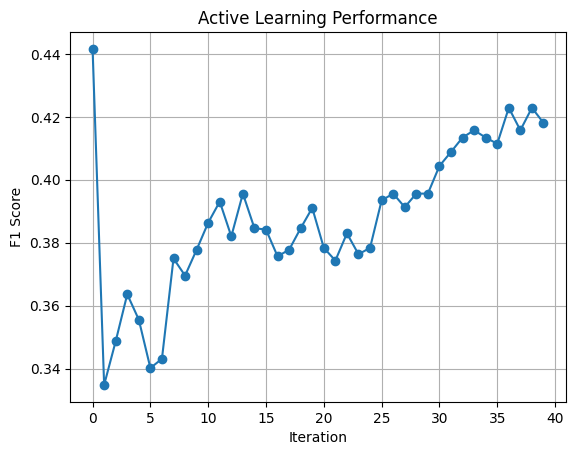

In [271]:
import matplotlib.pyplot as plt

plt.plot(f1_scores, marker='o')
plt.xlabel("Iteration")
plt.ylabel("F1 Score")
plt.title("Active Learning Performance")
plt.grid(True)
plt.show()


In [274]:
from sklearn.metrics import f1_score

batch_size = 20
num_iterations = 40

f1_scores = []

for i in range(num_iterations):

    # Train model on labelled subset
    clf.fit(X_labeled, y_labeled)

    # Evaluate on test set
    y_pred = clf.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    f1_scores.append(f1)
    print(f"Iteration {i}: Labeled size = {len(X_labeled)}, F1 = {f1:.4f}")

    # least confidence
    query_idx = least_confidence_acquisition(clf, X_unlabeled, batch_size)

    
    X_labeled = pd.concat(
        [X_labeled, X_unlabeled.iloc[query_idx]],
        axis=0
    )
    y_labeled = pd.concat(
        [y_labeled, y_unlabeled.iloc[query_idx]],
        axis=0
    )

    # ✅ Remove queried samples from unlabeled pool
    X_unlabeled = X_unlabeled.drop(
        X_unlabeled.index[query_idx]
    )
    y_unlabeled = y_unlabeled.drop(
        y_unlabeled.index[query_idx]
    )

    # ✅ Reset indices to keep everything aligned
    X_labeled = X_labeled.reset_index(drop=True)
    y_labeled = y_labeled.reset_index(drop=True)
    X_unlabeled = X_unlabeled.reset_index(drop=True)
    y_unlabeled = y_unlabeled.reset_index(drop=True)


Iteration 0: Labeled size = 1650, F1 = 0.4224
Iteration 1: Labeled size = 1670, F1 = 0.4224
Iteration 2: Labeled size = 1690, F1 = 0.4125


Iteration 3: Labeled size = 1710, F1 = 0.4099
Iteration 4: Labeled size = 1730, F1 = 0.4099
Iteration 5: Labeled size = 1750, F1 = 0.4099
Iteration 6: Labeled size = 1770, F1 = 0.4125
Iteration 7: Labeled size = 1790, F1 = 0.4231
Iteration 8: Labeled size = 1810, F1 = 0.4231
Iteration 9: Labeled size = 1830, F1 = 0.4204
Iteration 10: Labeled size = 1850, F1 = 0.4151
Iteration 11: Labeled size = 1870, F1 = 0.4177
Iteration 12: Labeled size = 1890, F1 = 0.4304
Iteration 13: Labeled size = 1910, F1 = 0.4331
Iteration 14: Labeled size = 1930, F1 = 0.4331
Iteration 15: Labeled size = 1950, F1 = 0.4387
Iteration 16: Labeled size = 1970, F1 = 0.4359
Iteration 17: Labeled size = 1990, F1 = 0.4387
Iteration 18: Labeled size = 2010, F1 = 0.4387
Iteration 19: Labeled size = 2030, F1 = 0.4387
Iteration 20: Labeled size = 2050, F1 = 0.4387
Iteration 21: Labeled size = 2070, F1 = 0.4387
Iteration 22: Labeled size = 2090, F1 = 0.4387
Iteration 23: Labeled size = 2110, F1 = 0.4387
Iteration 24: Labele

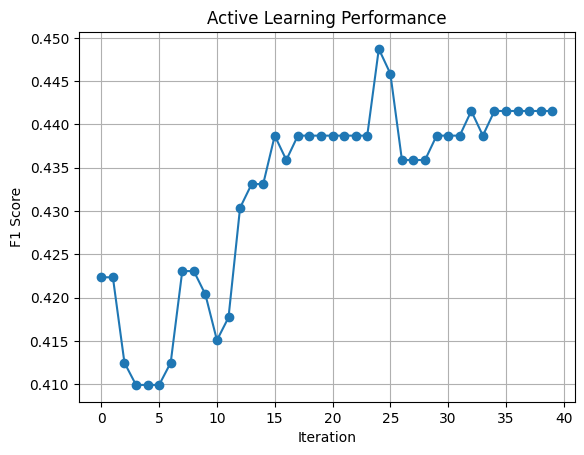

In [275]:
import matplotlib.pyplot as plt

plt.plot(f1_scores, marker='o')
plt.xlabel("Iteration")
plt.ylabel("F1 Score")
plt.title("Active Learning Performance")
plt.grid(True)
plt.show()
